# Sample looping

Finding good looping points for each sample.

In [5]:
import os
from numpy import *
from matplotlib.pyplot import *
from scipy import signal
import scipy.io.wavfile

In [27]:
def zcd(x, rising=True):
    # Find all indexes just before a zero-crossing
    if rising:
        return where(0 < diff(sign(x)))[0]
    else:
        return where(0 > diff(sign(x)))[0]

def moving_average(x, w):
    return convolve(x, ones(w), "same") / w

def find_loop_points(filename, start_range, stop_range, averages=1, rising=True, visualize=0):
    fs, x = scipy.io.wavfile.read(filename)
    
    # Apply some averaging before finding zero crossings
    x = moving_average(x, averages)
    
    # Ranges to search for loop points in
    N = len(x)
    start_range = [int(X*N) for X in start_range]
    stop_range = [int(X*N) for X in stop_range]
    
    # Find zero-crossings
    zc = zcd(x, rising=rising)
    
    # Find the closest-to-zero zero-crossing within start and stop range
    zc_start = min([X for X in zc if ((start_range[0]<=X) & (X<=start_range[1]))])
    zc_stop = min([X for X in zc if ((stop_range[0]<=X) & (X<=stop_range[1]))])

    # Plot start and stop range overlapping
    if visualize > 0:
        W = visualize
        fig, ax = subplots(1, 1)
        for n in [zc_start, zc_stop]:
            t = arange(0, 2*W)
            ax.plot(t, x[n-W : n+W])
            ax.plot(t[W], x[n], marker=".", color="k")
    
    return zc_start, zc_stop

volca_c0.wav 27195 71691
volca_c1.wav 26606 71110
volca_c2.wav 26713 70868
volca_c3.wav 26592 70614
volca_c4.wav 26538 70618
volca_c5.wav 26481 70590
volca_c6.wav 26477 70574


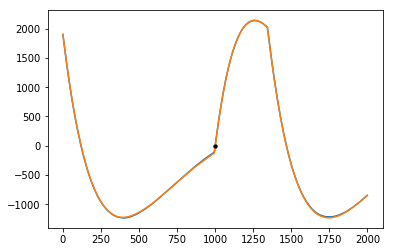

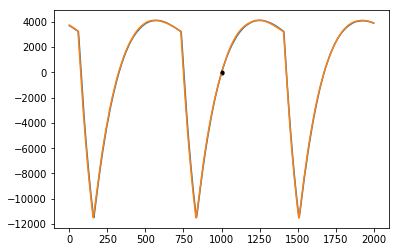

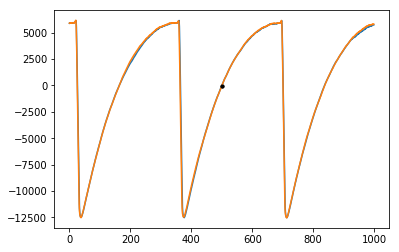

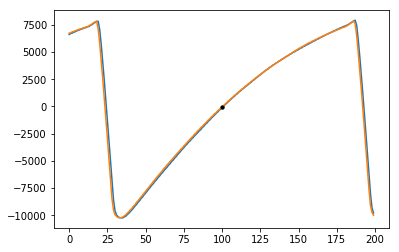

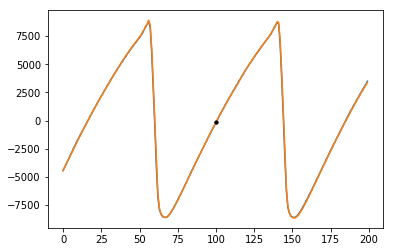

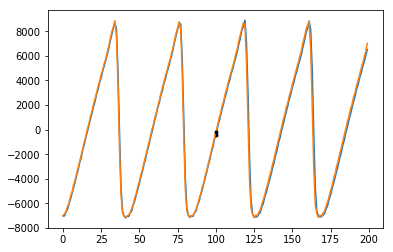

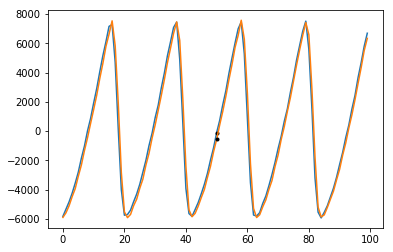

In [54]:
filedir = "../app/sound/"
for filename, averages, window in [
        ["volca_c0.wav", 1000, 1000],
        ["volca_c1.wav", 100, 1000],
        ["volca_c2.wav", 10, 500],
        ["volca_c3.wav", 10, 100],
        ["volca_c4.wav", 5, 100],
        ["volca_c5.wav", 3, 100],
        ["volca_c6.wav", 3, 50]
    ]:
    start, stop = find_loop_points(
        os.path.join(filedir, filename),
        [0.3, 0.4],
        [0.8, 0.9],
        averages=averages,
        rising=True,
        visualize=window,
    )
    
    print(filename, start, stop)
    